In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
cars = pd.read_csv('cars-dataset.csv')

In [10]:
cars2 = pd.read_csv('cars-dataset.csv')

In [3]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
cars.tail()

,car name,cyl,disp,hp,wt,acc,yr,mpg
393,ford mustang gl,4,140.0,86,2790,15.6,82,27.0
394,vw pickup,4,97.0,52,2130,24.6,82,44.0
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


In [5]:
cars.shape

(398, 8)

In [6]:
cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [9]:
cars.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [24]:
#Check for non numeric values in all the columns

In [11]:
cars.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

car name    False
cyl          True
disp         True
hp          False
wt           True
acc          True
yr           True
mpg          True
dtype: bool

1. car name can have non numeric values
2. hp has to have only numeric values

In [21]:
#Check for total non numeric values on hp

In [15]:
sum(~cars.hp.str.isnumeric())

6

In [22]:
cars[~cars.hp.str.isnumeric()]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [16]:
#Replace '?' with np.nan

In [12]:
cars = cars.replace('?',np.nan)

In [13]:
cars['hp'] = cars['hp'].astype("Float64")

In [14]:
cars.isnull().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [16]:
#Impute missing values:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)

In [17]:
imp_mean.fit(cars.iloc[:,1:])

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [84]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [18]:
cars.iloc[:,1:] = imp_mean.transform(cars.iloc[:,1:])

In [92]:
cars.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [93]:
#Univariate analysis:

In [95]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.080960,38.377662,46.0,75.000,92.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


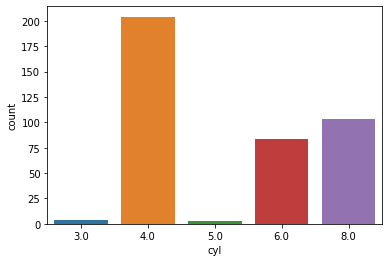

In [96]:
sns.countplot(cars.cyl)

In [19]:
cars.cyl.value_counts()/ sum(cars.cyl.value_counts()) * 100

4.0    51.256281
8.0    25.879397
6.0    21.105528
3.0     1.005025
5.0     0.753769
Name: cyl, dtype: float64

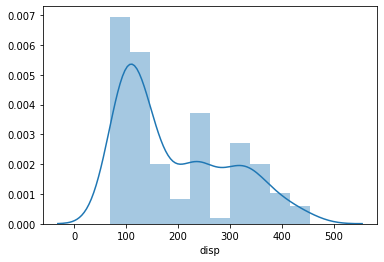

In [97]:
sns.distplot(cars.disp)

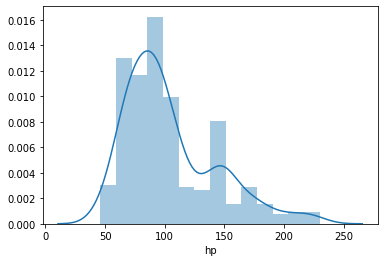

In [99]:
sns.distplot(cars.hp)

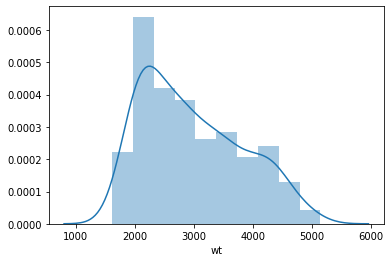

In [101]:
sns.distplot(cars.wt)

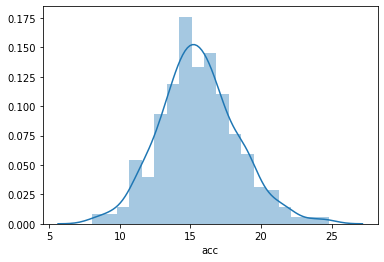

In [102]:
sns.distplot(cars.acc)

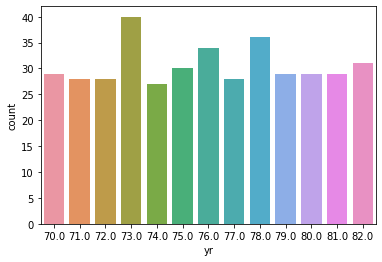

In [103]:
sns.countplot(cars.yr)

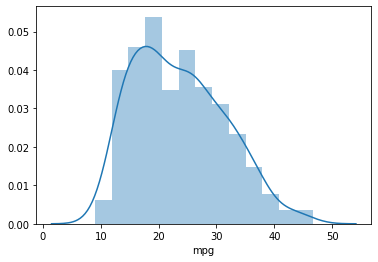

In [111]:
sns.distplot(cars.mpg)

Observations:
1. Majority of the cars have 4 cyl(51%);  followed by cars with 8 cyl(25%) and 6 cyl(21%)
2. Disp is right skewed with 1 peak and 2 humps in the right side
3. HP is right skewed with small hump on the right side
4. Acc is normally distributed
5. yr is fairly uniform with mz number of cars in year 73

In [112]:
#Outliers:

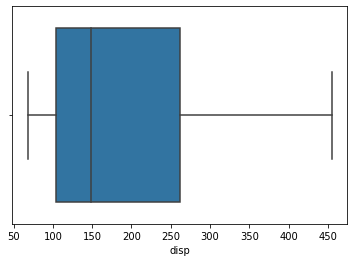

In [113]:
sns.boxplot(cars.disp)

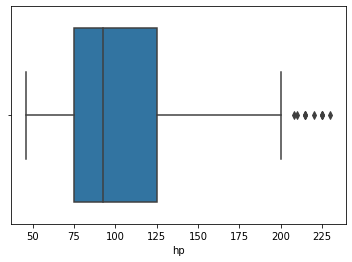

In [114]:
sns.boxplot(cars.hp)

There are some outlier points in hp. We don't have to remove/treat them now as they may be influential in cluster formation

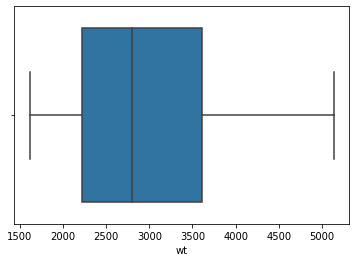

In [115]:
sns.boxplot(cars.wt)

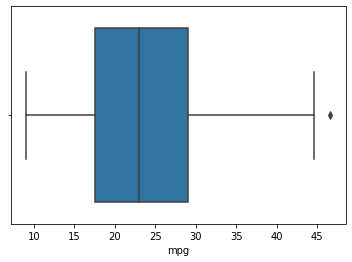

In [116]:
sns.boxplot(cars.mpg)

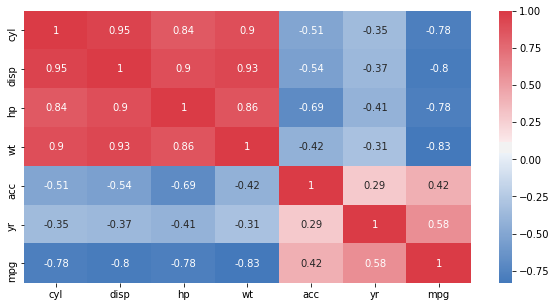

In [123]:
plt.figure(figsize=(10,5))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(cars.corr(), cmap = cmap, annot = True);

1. There is fairly strong postive corrleation among cyl,disp,hp and wt
2. mpg is negatively correlated with cyl,disp,hp and wt

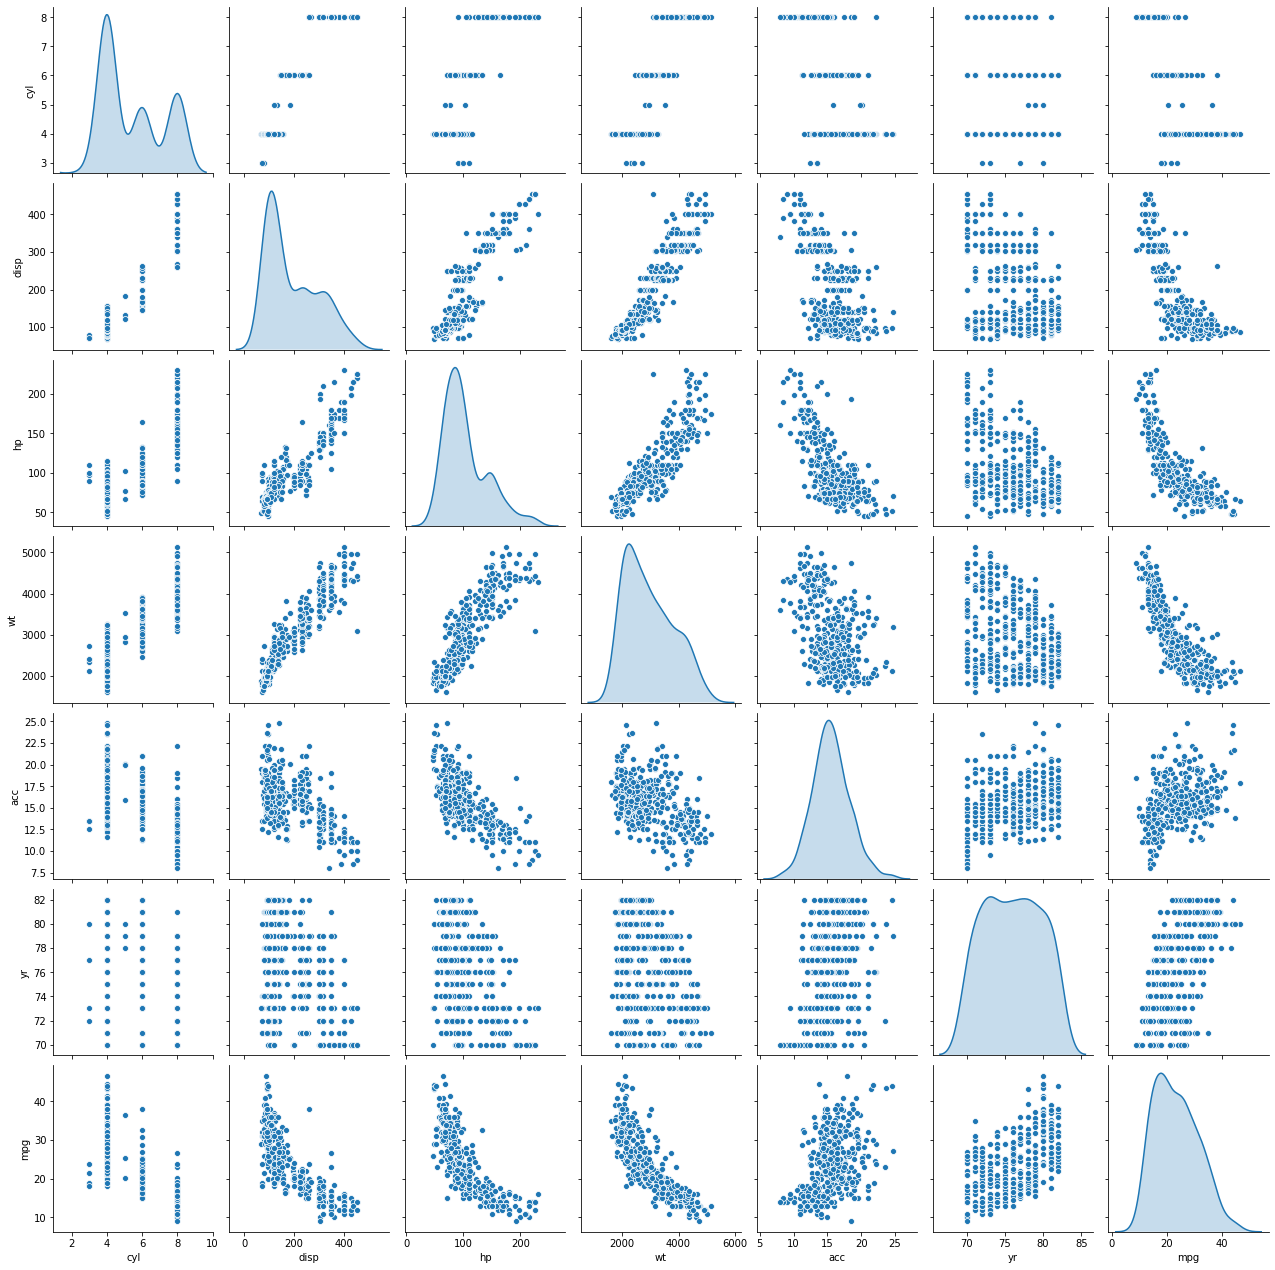

In [128]:
sns.pairplot(cars,diag_kind='kde')

1. cyl has 3 distinct peaks at 4,6 & 8
2. disp,hp and wt have postive relation
3. mpg has a negative relation with disp,hp and wt

In [ ]:
#mpg vs cyl

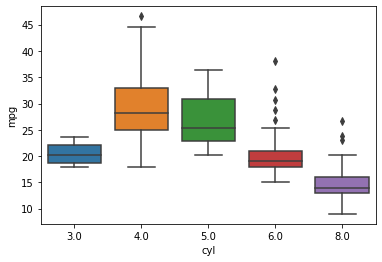

In [130]:
sns.boxplot(x='cyl',y='mpg',data=cars)

1. Cars with 4 cyl have the best mpg in general
2. As the number of cyl increases to 6 and 8 , we see a drop in mpg

In [132]:
#yr vs mpg:

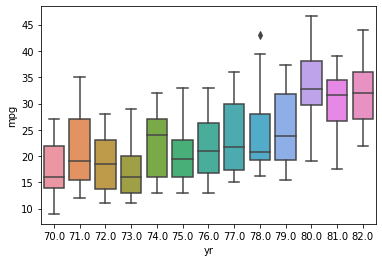

In [133]:
sns.boxplot(x='yr',y='mpg',data=cars)

The cars manufactured in later years seems to have better mpg. As the years go by we see improvement in mpg.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
scaled_df = scaler.fit_transform(cars.iloc[:,1:])

In [179]:
scaled_df.shape

(398, 7)

### K means:

In [4]:
from sklearn.cluster import KMeans 

In [23]:
k = KMeans(3)

In [24]:
a = k.fit_transform(scaled_df)


In [29]:
len(a)

398

In [30]:
a

array([[0.90224866, 0.42406906, 1.36130901],
       [1.04673575, 0.36180562, 1.49402311],
       [0.96070113, 0.41333173, 1.40596809],
       ...,
       [0.81166171, 1.41951909, 0.34891438],
       [0.73187216, 1.41946002, 0.25697347],
       [0.76040602, 1.4415131 , 0.27939044]])

In [180]:
wss =[] 
k = range(1,10)
for num_clusters in k:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  wss.append( clusters.inertia_ ) 
  print(f"WSS for k={num_clusters} = {clusters.inertia_}")

WSS for k=1 = 2785.999999999999
WSS for k=2 = 1294.7279036575994
WSS for k=3 = 945.2938015385665
WSS for k=4 = 737.6191529206179
WSS for k=5 = 663.2821633905983
WSS for k=6 = 593.510171133315
WSS for k=7 = 539.4041872984087
WSS for k=8 = 495.2894824621716
WSS for k=9 = 452.93674711894937


Text(0, 0.5, 'WSS')

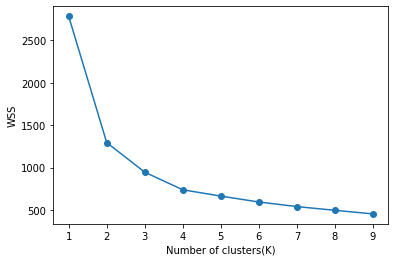

In [181]:
#plt.figure(figsize=(12,6))
plt.plot( k, wss, marker = "o" )
plt.xlabel('Number of clusters(K)')
plt.ylabel('WSS')

In [182]:
#Use silhouette score to evaluate between 3 and 4 clusters

In [185]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 3 The average silhouette_score is : 0.35346988244589955


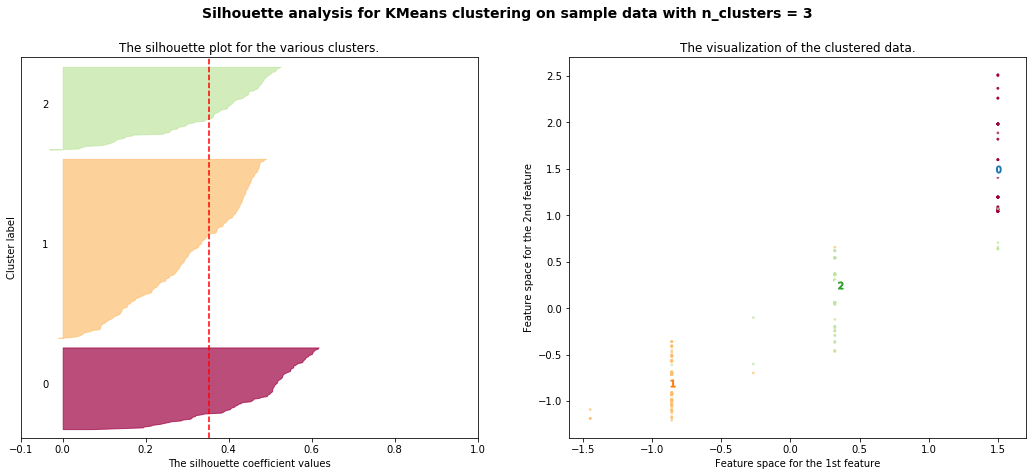

For n_clusters = 4 The average silhouette_score is : 0.34827362636649434


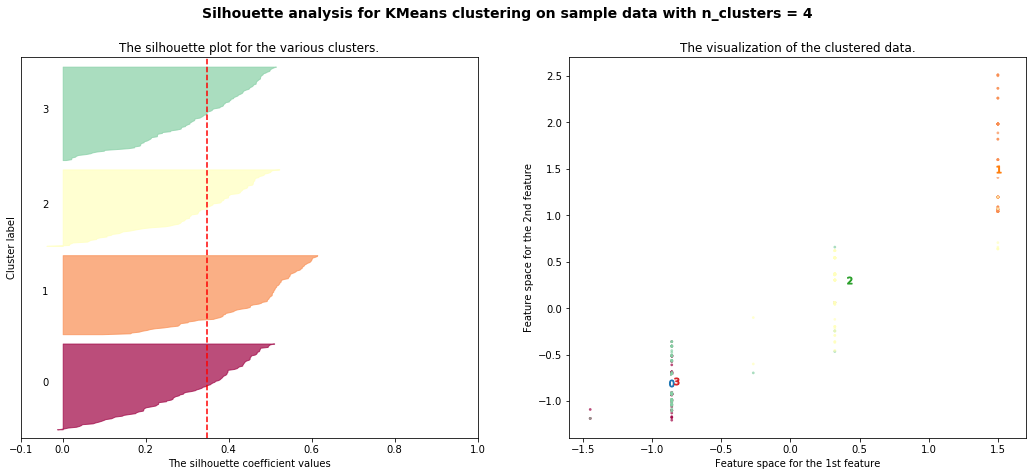

In [186]:
for n_clusters in [3,4]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_df[:, 0], scaled_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

### From the silhouette analysis we can conclude that the optimum number of clusters = 3

In [344]:
clusters = KMeans(3)
clusters.fit(scaled_df)
labels = clusters.labels_                     # capture the cluster lables

In [188]:
clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0,

In [345]:
unique, counts = np.unique(clusters.labels_, return_counts=True)
print('K Means cluster values:')
print(np.asarray((unique, counts)).T)

K Means cluster values:
[[  0  96]
 [  1 207]
 [  2  95]]


### Hierarchial Clustering:

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(scaled_df, 'ward', metric='euclidean' )

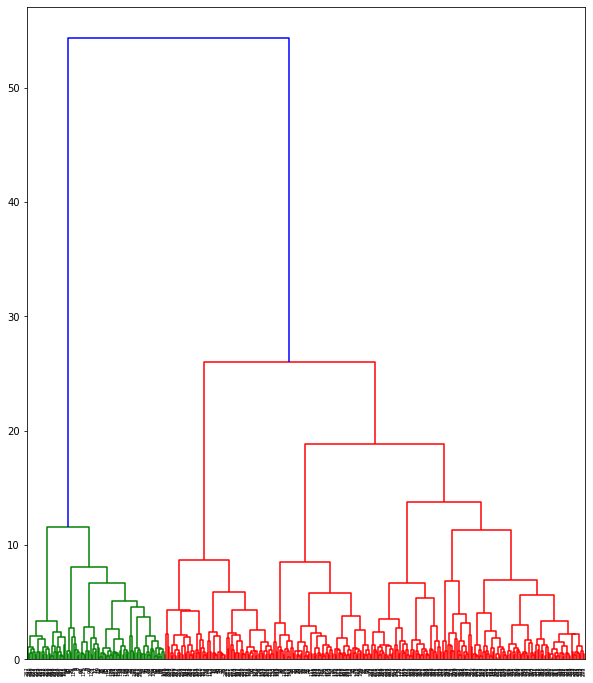

In [208]:
fig = plt.figure(figsize=(10, 12))
dend = dendrogram(z)

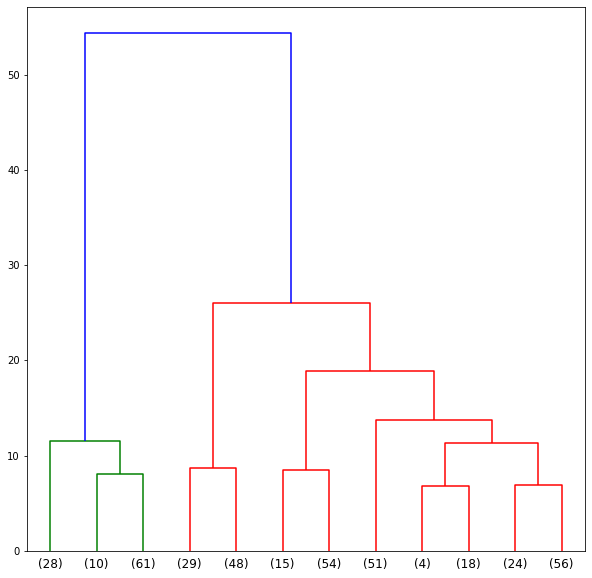

In [215]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(z,p=12,truncate_mode='lastp')

In [216]:
from scipy.cluster.hierarchy import fcluster

In [303]:
clusters = fcluster(z,20,'distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 3, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2,

In [304]:
unique, counts = np.unique(clusters, return_counts=True)
print('Hierachial cluster values:')
print(np.asarray((unique, counts)).T)

Hierachial cluster values:
[[  1  99]
 [  2  77]
 [  3 222]]


As we can see the results from both K means and Hierarchical clustering are almost the same.

##### The possible reason for the formation of 3 clusters is due to weightage of cyl. As we saw earlier there were 3 distinct peaks for cyl at 4, 6 & 8.

#### Difference between K means and Hierarchial clustering:

K Means:

The k-means algorithm is parameterized by the value k, which is the number of clusters. The algorithm begins by creating k centroids. It then iterates where each sample is assigned to its closest centroid. This iteration continues until no sample is re-assigned to a different centroid

Hierachial:

Agglomerative hierarchical clustering builds clusters incrementally, producing a dendogram. The algorithm begins by assigning each sample to its own cluster (top level). At each step, the two clusters that are the most similar are merged; the algorithm continues until all of the clusters have been merged. 

### Linear Regression with whole dataset:

In [450]:
data_df = pd.concat([cars.iloc[:,1:],pd.Series(clusters.labels_).rename('cluster')],axis=1)

In [451]:
data_df.head()

,cyl,disp,hp,wt,acc,yr,mpg,cluster
0,8.0,307.0,130.0,3504.0,12.0,70.0,18.0,2
1,8.0,350.0,165.0,3693.0,11.5,70.0,15.0,2
2,8.0,318.0,150.0,3436.0,11.0,70.0,18.0,2
3,8.0,304.0,150.0,3433.0,12.0,70.0,16.0,2
4,8.0,302.0,140.0,3449.0,10.5,70.0,17.0,2


In [247]:
data_df.cluster.value_counts()

1    207
0     96
2     95
Name: cluster, dtype: int64

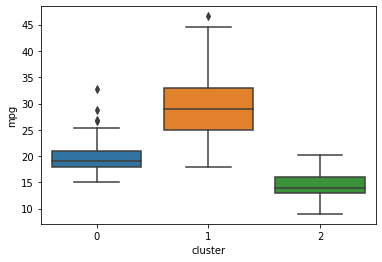

In [459]:
sns.boxplot(x='cluster',y='mpg',data=data_df)

In [417]:
X = data_df.loc[:,['cyl','hp','wt','acc','yr']] #Removing disp as it high multicollinear with cyl
y = data_df.iloc[:,-2]

In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 5)
(80, 5)
(318,)
(80,)


In [419]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

In [406]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [420]:
print('R square : ',round(regressor.score(X_test,y_test),2))
print('Coeff : ',regressor.coef_)
print('MAE : ',mean_absolute_error(y_test,y_pred))
print('MSE : ',mean_squared_error(y_test,y_pred))

R square :  0.82
Coeff :  [ 5.09602622e-02  4.16333846e-04 -6.49833245e-03  1.82682383e-01
  7.51409770e-01]
MAE :  2.7120016529218267
MSE :  11.54639270144786


### Linear Regression with Individual clusters:

In [231]:
cluster0 = data_df[data_df['cluster'] == 0]

In [239]:
cluster1 = data_df[data_df['cluster'] == 1]

In [232]:
cluster2 = data_df[data_df['cluster'] == 2]

In [412]:
def lin_reg(df):
    X = df.loc[:,['cyl','hp','wt','acc','yr']]
    y = df.iloc[:,-2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred=regressor.predict(X_test)
    print('R square : ',round(regressor.score(X_test,y_test),2))
    print('Coeff : ',regressor.coef_)
    print('MAE : ',mean_absolute_error(y_test,y_pred))
    print('MSE : ',mean_squared_error(y_test,y_pred))

In [413]:
lin_reg(cluster0)

R square :  0.68
Coeff :  [ 0.46876346 -0.01678642 -0.00371441 -0.23071748  0.5305349 ]
MAE :  1.2649036924030665
MSE :  2.532673833342479


In [414]:
lin_reg(cluster1)

R square :  0.42
Coeff :  [ 4.24146537 -0.06128533 -0.00885579  0.08289576  0.93491979]
MAE :  2.77841177169898
MSE :  10.562999056816283


In [415]:
lin_reg(cluster2)

R square :  0.6
Coeff :  [ 0.         -0.02166201 -0.00136879 -0.40825354  0.39797647]
MAE :  0.9919264280716272
MSE :  1.6981033385269184


Observations:
1. The R Square is better in whole dataset compared to individual clusters.
2. The MAE and MSE has come down in individual clusters compared to whole dataset. This gives us better insights and understanding on how the error rate is across the the data points(clusters).